In [1]:
from soh_curve_functions import *

In [3]:
cell_ids = select_cells_ids()  # User selects cell IDs
checkups = []

valid_cell_ids = []  # Para armazenar apenas IDs existentes

for cell_id in cell_ids:
    paths = find_cell_check_ups_files(cell_id)
    if not paths:
        print(f"Warning: No check-up files found for cell {cell_id}, removing from list")
    else:
        checkups.append(paths)
        valid_cell_ids.append(cell_id)

# Agora 'valid_cell_ids' contém apenas os IDs que existem
cell_ids = valid_cell_ids

print(cell_ids)
print(len(checkups))


['458', '306', '401']
3


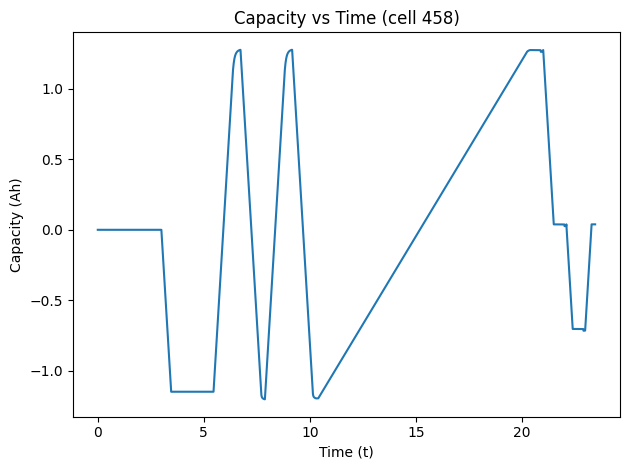

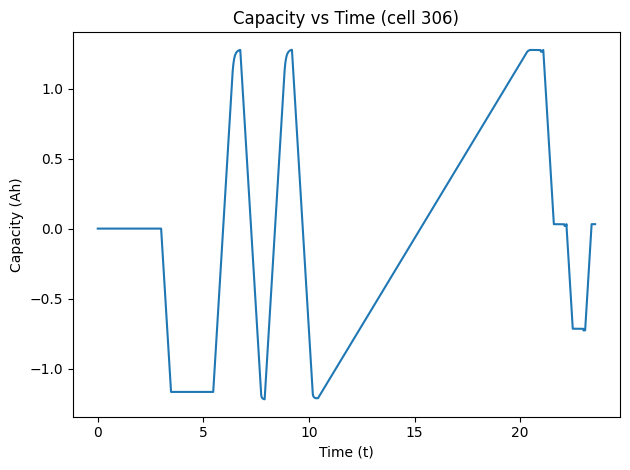

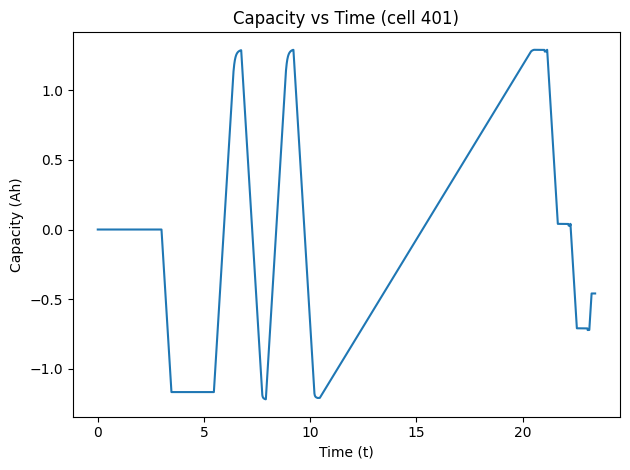

In [4]:
# Load and analyze initial check-up data for selected cells
for i in range(len(checkups)):
    initial_data = load_cell_data(checkups[i][0])
    match = re.search(r'-([^-/_]+)_', checkups[i][0])
    plot_capacity_vs_time(initial_data["Time"], initial_data["Ah"], match.group(1))

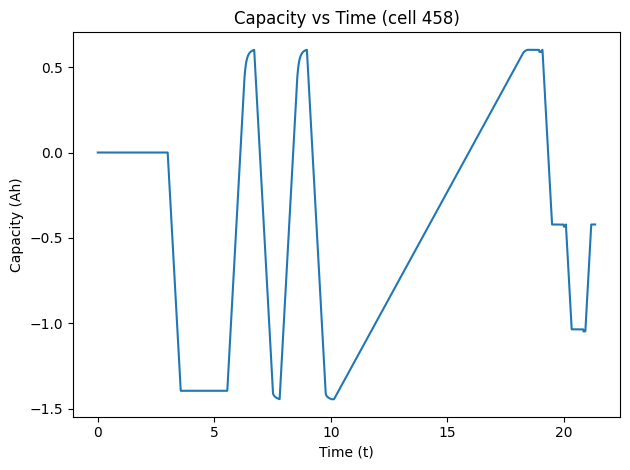

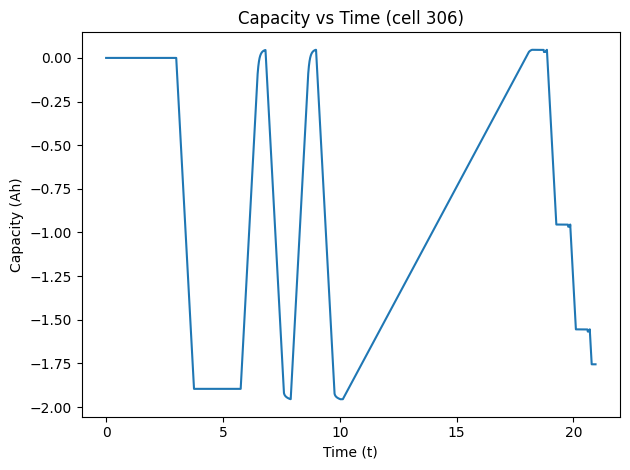

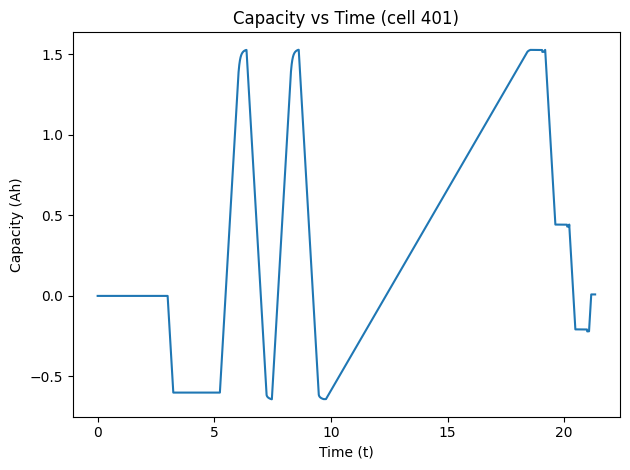

In [5]:
# Load and analyze final check-up data for selected cells
for i in range(len(checkups)):
    final_data = load_cell_data(checkups[i][-1])
    match = re.search(r'-([^-/_]+)_', checkups[i][-1])
    plot_capacity_vs_time(final_data["Time"], final_data["Ah"], match.group(1))

In [ ]:
# Extract capacity data from all check-up cycles
capacity_values = []
checkup_cycles = []
for i in range(len(checkups)):
  capacity_values_cell, checkup_cycles_cell = extract_capacity_data(checkups[i])
  capacity_values.append(capacity_values_cell)
  checkup_cycles.append(checkup_cycles_cell)
  print(f"Cell {cell_ids[i]}: processed {len(checkup_cycles_cell)} check-up cycles")

['Data_publication/Data_publication/CU_Dynamic/CU000/BW-VTC-458_7068_CU_cyc_000_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU001/BW-VTC-458_7134_CU_cyc_001_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU002/BW-VTC-458_7322_CU_cyc_002_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU003/BW-VTC-458_7455_CU_cyc_003_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU004/BW-VTC-458_5129_CU_cyc_004_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU005/BW-VTC-458_5215_CU_cyc_005_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU006/BW-VTC-458_7792_CU_cyc_006_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU007/BW-VTC-458_5317_CU_cyc_007_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU008/BW-VTC-458_7880_CU_cyc_008_BW-VTC-AgeVal.mat', 'Data_publication/Data_publication/CU_Dynamic/CU009/BW-VTC-458_8034_CU_cyc_009_BW-VTC-AgeVal.mat', 'Data_pub

In [22]:
# Calculate and display State of Health metrics
soh_percentages = []
for i in range(len(cell_ids)):
    soh_array = calculate_soh(capacity_values[i])
    soh_percentages.append(soh_array)
    print(f"\nSoH Results (cell {cell_ids[i]}):")
    for j in range(len(checkup_cycles[i])):
        print(f"Check-up {checkup_cycles[i][j]}: {soh_array[j]:.1f}%")


SoH Results (cell 458):
Check-up 0: 99.3%
Check-up 1: 93.2%
Check-up 2: 91.5%
Check-up 3: 89.7%
Check-up 4: 88.1%
Check-up 5: 86.8%
Check-up 6: 85.4%
Check-up 7: 84.3%
Check-up 8: 83.8%
Check-up 9: 82.8%
Check-up 10: 82.3%
Check-up 11: 81.9%

SoH Results (cell 306):
Check-up 0: 99.9%
Check-up 1: 93.2%
Check-up 2: 85.5%
Check-up 3: 80.1%

SoH Results (cell 401):


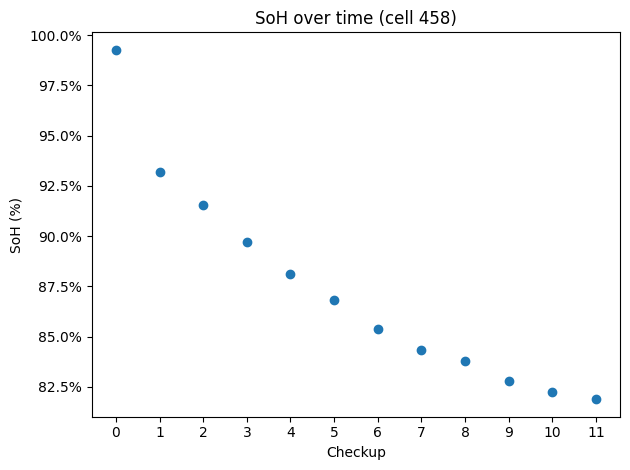

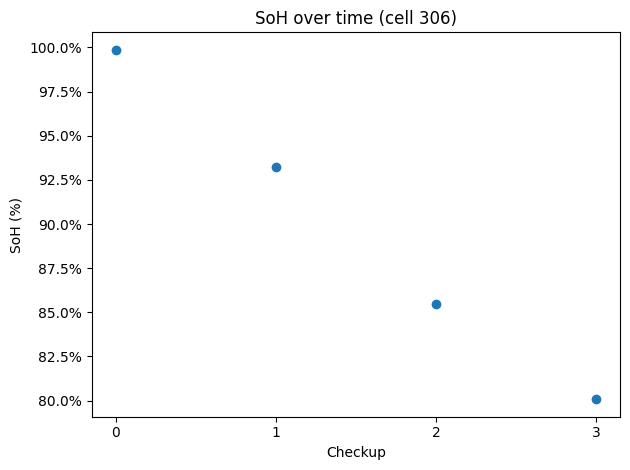

ValueError: x and y must be the same size

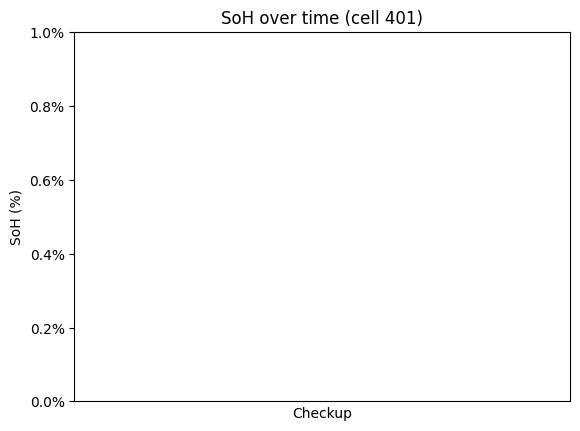

In [23]:
# Visualize battery health degradation trend
for i in range(len(cell_ids)):
    plot_soh_vs_checkups(checkup_cycles[i], soh_percentages[i], cell_ids[i])